<a href="https://colab.research.google.com/github/J0AZZ/audio-analysis/blob/master/harmonic_percussive_source_separation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal

In [ ]:
# load example espectrogram
audio, sampling_rate = librosa.load(librosa.ex("nutcracker"), duration=10)

# copy variables
S, sr = audio, sampling_rate


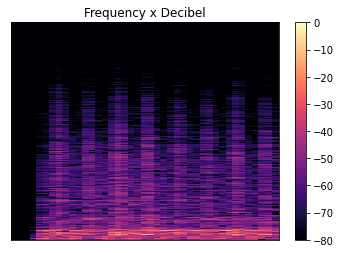

In [ ]:
# compute short time fourier transform and change the intensity representation to decibels
STFT = librosa.stft(S, sr)
S_db = librosa.amplitude_to_db(np.abs(STFT), ref=np.max)

# plot (Frequency x Decibel) spectrogram
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, ax=ax)
ax.set(title="Frequency x Decibel")
ax.label_outer()
fig.colorbar(img, ax=ax)

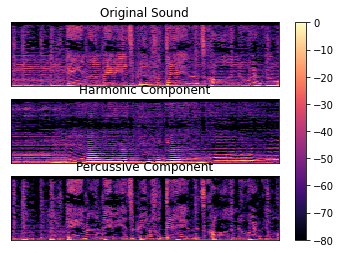

In [ ]:
# loading an example with harmonic and percussive components
audio, sr = librosa.load(librosa.ex("fishin"), duration=5, offset=10)

# get the short time fourier transform
audio_stft = librosa.stft(audio)

# separate harmonic and percussive sources
harmonic, percussive = librosa.decompose.hpss() 

# displaying only the harmonic component
ref_power = np.max(np.abs(audio_stft)) # calculate a reference power based on input
fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True)
# img = librosa.display.specshow(librosa.amplitude_to_db(np.abs(audio), ref=ref_power))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(audio_stft), ref=ref_power), ax=ax[0])
librosa.display.specshow(librosa.amplitude_to_db(np.abs(harmonic), ref=ref_power), ax=ax[1])
librosa.display.specshow(librosa.amplitude_to_db(np.abs(percussive), ref=ref_power), ax=ax[2])


ax[0].set(title="Original Sound")
ax[1].set(title="Harmonic Component")
ax[2].set(title="Percussive Component")
ax[0].label_outer()
ax[1].label_outer()
ax[2].label_outer()
fig.colorbar(img, ax=ax)

Here we're gonna build a filter to increase the performance of a chord detection machine learning based model.

[+] returning:  [harmonic, percussive, h_chroma, p_chroma]


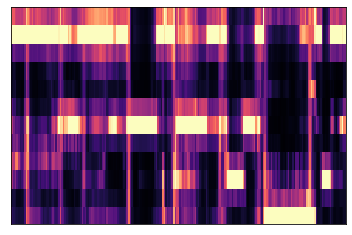

In [34]:
def extract_component(s, sr):
  stft = librosa.stft(s, sr)
  harmonic, percussive = librosa.decompose.hpss(stft)
  h_chroma = librosa.feature.chroma_stft(librosa.istft(harmonic))
  p_chroma = librosa.feature.chroma_stft(librosa.istft(harmonic))
  print("[+] returning:  [harmonic, percussive, h_chroma, p_chroma]")
  return [harmonic, percussive, h_chroma, p_chroma]

components = extract_component(audio, sr)
librosa.display.specshow(components[2])

# def filter